<a href="https://colab.research.google.com/github/dalancherosn/Deep-Learning/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 for Image Recoginition.

## Introduction.

In the present notebook we present an application of the Convolutional Neural Network architecture to the dataset CIFAR-10, which consists in a series of images named with 10 different labels. The main objective of this notebook is to extend the instances of the dataset changing the images and train the neural network comparing Batch normalization. 

To begin, we need to install the following libraries:

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

In [ ]:
!pip install mlxtend==0.17.0

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
import numpy as np
import time
from datetime import timedelta
import math
import os

In [ ]:
print(tf.__version__)

2.0.0-rc0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Load Data.

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
class_names = ['airplane',
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck']

We proceed to the normalization of the training and test sets.

In [ ]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

## Data Dimesions.

The data dimensions are used in several places in the source code below.

In [ ]:
img_size = (32, 32)
num_channels = 3
num_classes = 10

The images are $32\times 32$ pixels, but we will crop the images to $24\times 24$ pixels.

In [ ]:
img_size_cropped = 24

## Helper-function for plotting images

Function used to plot $9$ images in a $3\times 3$ grid, and writing the true and predicted classes below each image.

In [ ]:
def plot_images(images, cls_true, cls_pred = None, smooth = True):
  """
  images can work as X_train[0:9, :]
  """
  assert len(images) == len(cls_true) == 9 # it raises an AssertionError if we introduce a number different to the nine entries

  # Create figure with sub-plots.
  fig, axes = plt.subplots(3, 3)

  # Adjust vertical spacing if we need to print ensemble and best-net.
  if cls_pred is None:
    hspace = 0.3
  else:
    hspace = 0.6
  fig.subplots_adjust(hspace = hspace, wspace = 0.3)

  for i, ax in enumerate(axes.flat): # axes.flat is called with the aim to iterate along all subplots
    # Interpolation type.
    if smooth:
      interpolation = 'spline16'
    else:
      interpolation = 'nearest'

    # Plot image.
    ax.imshow(images[i, :, :, :],
              interpolation = interpolation)
  
    # Name of the true class.
    cls_true_name = class_names[cls_true[i]]

    # Show true and predicted classes.
    if cls_pred is None:
      xlabel = 'True: {0}'.format(cls_true_name)
    else:
      # Name of the predicted class.
      cls_pred_name = class_names[cls_pred[i]]

      xlabel = 'True: {0}\nPred: {1}'.format(cls_true_name, cls_pred_name)

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot
    ax.set_xticks([])
    ax.set_yticks([])

  # Ensure the plot is shown correctly with multiple plots
  # in a single Notebook cell.
  plt.show()

### Plot a few images to see if data is correct

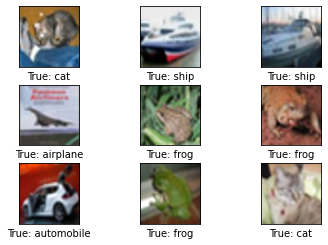

In [ ]:
# Get the first images from the test-set.
images = X_test[0:9]

#Get the true classes for those images.
cls_true = y_test[0:9].flatten()

# Plot the images and labels using our helper-function above.
plot_images(images = images, cls_true = cls_true, smooth = True)

## Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')) # we don't have to define the input size here
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 10, verbose = 1, validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 231s 5ms/sample - loss: 1.3832 - sparse_categorical_accuracy: 0.5052 - val_loss: 1.1258 - val_sparse_categorical_accuracy: 0.6026
Epoch 2/10
17210/50000 [=========>....................] - ETA: 2:25 - loss: 1.0830 - sparse_categorical_accuracy: 0.6130

KeyboardInterrupt: ignored

In [ ]:
# plot training and validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred)

In [ ]:
plot_confusion_matrix(mat, figsize = (12, 12), class_names = classes_name, show_normed = True)